# Geometrical Methods in Machine Learning
## Seminar 4: Manifold Learning Methods

In [1]:
from __future__ import print_function

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import offsetbox

import numpy as np
from sklearn.datasets import load_digits, fetch_olivetti_faces, make_moons, make_circles, fetch_mldata
from sklearn.datasets.samples_generator import make_swiss_roll

from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1. Swiss roll

In [3]:
# load data
X, color = make_swiss_roll(n_samples=1000, random_state=123, noise=0.01)
X.shape

(1000, 3)

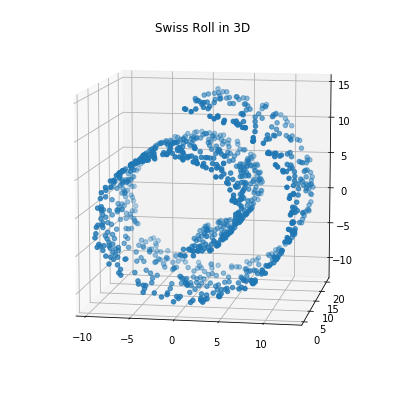

In [4]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.title('Swiss Roll in 3D')
plt.show()

## 1.1 PCA

In [7]:
model = PCA(n_components=2)
X_pca = model.fit_transform(X)

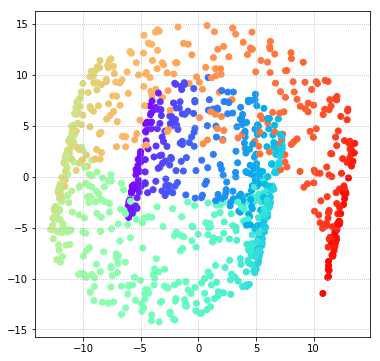

In [8]:
plt.figure(figsize=(6,6))
plt.grid(linestyle="dotted")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.rainbow)

## 1.2 Kernel PCA

In [11]:
model = KernelPCA(n_components=2, kernel="poly", degree=3)
X_kpca = model.fit_transform(X)

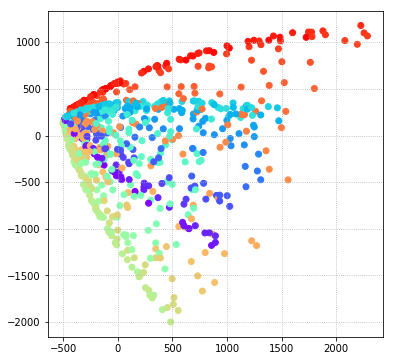

In [12]:
plt.figure(figsize=(6,6))
plt.grid(linestyle="dotted")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap=plt.cm.rainbow)

### MDS

#### Intuition

Embedding should preserve distances between points.

$$J_{MDS}(z_1, \dots, z_n) = \sum_{ij}^n ((x_i, x_j) - (z_i, z_j))^2$$

#### Algorithm

Given a dataset $X = \{x_1, \dots, x_n \} \in \mathbb{R}^{D \times n}$,

1. Compute Gram matrix of $G \in \mathbb{R}^{n \times n}$, s.t. $g_{ij} = (x_i, x_j) = X^TX$
2. Find $d$ eigenvectors $\{ v_1, \dots, v_d \} \in \mathbb{R}^{n \times d}$ of $G$, corresponding to $d$ largest eigenvalues: $\Lambda = diag(\lambda_1, \dots, \lambda_d) \in \mathbb{R}^{d \times d}$.
3. Compute the embedding $\{z_1, \dots, z_n \} = \Lambda^{1/2} \{ v_1, \dots, v_d \}^T$

## 1.3 Isomap

#### Intuition

Manifold is globally isometric to a convex subset of Euclidean space.

#### Algorithm

Given a dataset $X = \{x_1, \dots, x_n \} \in \mathbb{R}^{D \times n}$,

1. Estimate the neighborhood $\mathcal{N}_i$ of each point, eigher within $\varepsilon$-ball or take $k$ nearest neighbors.
2. Build a graph on points, with adjancency matrix $A$, s.t. $a_{ij} = 1$ if the points are neighbors and $0$ otherwise.
3. Estimate pairwise geodesic distances between any two points, by shortest paths between nodes of the graph.
4. Perform MDS on pairwise distance matrix.

In [13]:
model = Isomap(n_components=2)
X_isomap = model.fit_transform(X)

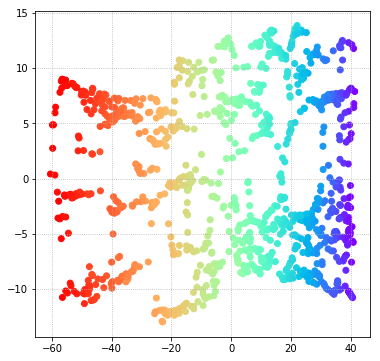

In [14]:
plt.figure(figsize=(6,6))
plt.grid(linestyle="dotted")
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.rainbow)

## 1.4 Locally Linear Embedding

#### Intuition

Manifold is locally linear. The same weights that reconstruct the datapoints in $D$ dimensions should reconstruct it in the manifold in $d$ dimensions.

#### Algorithm

Given a dataset $X = \{x_1, \dots, x_n \} \in \mathbb{R}^D$,

- Estimate the neighborhood $\mathcal{N}_i$ of each point, eigher within $\varepsilon$-ball or take $k$ nearest neighbors.
- 

$$W = \arg \min_W \sum_i^n \| x_i - \sum_j^n W_{ij} x_j \|^2, \\
s.t. \sum_j^n W_{ij} = 1, \forall i, \\
W_{ij} = 0, x_j \notin \mathcal{N}_i$$

- Given the weights W, find the embedded points:

$$\{z_1, \dots, z_n\} = \arg \min_{\{z_1, \dots, z_n\}} \sum_i^n \| z_i - \sum_i^n W_{ij} z_j \|^2 \\
s.t. \sum_i^n z_i = 0\\
cov(Z) = \mathbb{I}$$

The same weights that reconstruct the datapoints in $D$ dimensions should reconstruct it in the manifold in $d$ dimensions.

In [17]:
model = LocallyLinearEmbedding(n_components=2, n_neighbors=15)
X_lle = model.fit_transform(X)

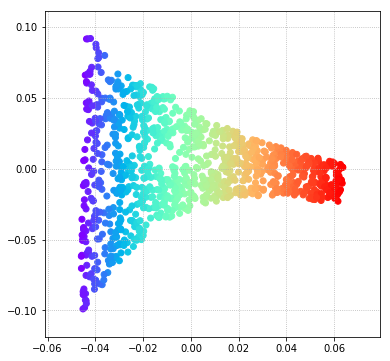

In [18]:
plt.figure(figsize=(6,6))
plt.grid(linestyle="dotted")
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)

## 1.5 Laplacian Eigenmaps

#### Intuition

Manifold can be reconstructed with computing Laplacian of the graph, which is empirical version of Laplace-Beltrami operator of smooth manifold.

#### Algorithm

Given a dataset $X = \{x_1, \dots, x_n \} \in \mathbb{R}^{D \times n}$,

1. Estimate the neighborhood $\mathcal{N}_i$ of each point, eigher within $\varepsilon$-ball or take $k$ nearest neighbors.
2. Build adjancency graph, with adjacency matrix $A$ s.t.

$$a_{ij} = \exp(\lambda \| x_i - x_j \|^2), if x_j \in \mathcal{N}_i \\
a_{ij} = 0, otherwise$$

3. Compute graph Laplacian $L = D - A \in \mathbb{R}^{n \times n}$, where $D$ s.t. $d_{ii} = \sum_i^n A_{ij}$ and solve eigenvalue problem: 

$$Lv = \lambda Dv,\\
v \in \mathbb{R}^n$$

Given $d+1$ eigenvectors, corresponding to _smallest_ eigenvalues, compute the emdedding:

$$\{z_1, \dots, z_n \} = \{f_1(i), \dots, f_d(i)\}^T \in \mathbb{R}^d$$

In [35]:
model = SpectralEmbedding(n_components=2, n_neighbors=25)
X_le = model.fit_transform(X)

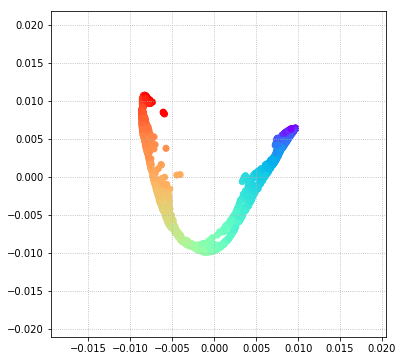

In [36]:
plt.figure(figsize=(6,6))
plt.grid(linestyle="dotted")
plt.scatter(X_le[:, 0], X_le[:, 1], c=color, cmap=plt.cm.rainbow)

## 1.6 Local Tangent Space Alignment

#### Intuition

Local linearity assumption. Manifold can be approximated using tangent spaces to each point.

#### Algorithm

Given a dataset $X = \{x_1, \dots, x_n \} \in \mathbb{R}^{D \times n}$,

1. Estimate the neighborhood $\mathcal{N}_i$ of each point, eigher within $\varepsilon$-ball or take $k$ nearest neighbors.
2. Build a graph on points, with adjancency matrix $A$, s.t. $a_{ij} = 1$ if the points are neighbors and $0$ otherwise.
3. Estimate tangent spaces to each point using Local PCA, align tangent spaces.
4. Compute the embedding.

In [37]:
model = LocallyLinearEmbedding(n_components=2, n_neighbors=15, method="ltsa")
X_ltsa = model.fit_transform(X)

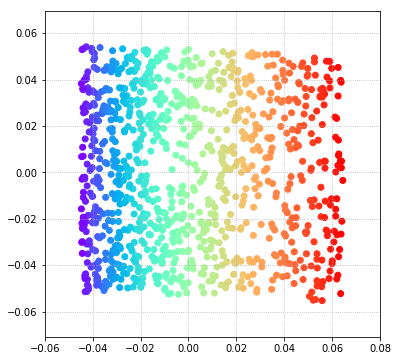

In [38]:
plt.figure(figsize=(6,6))
plt.grid(linestyle="dotted")
plt.scatter(X_ltsa[:, 0], X_ltsa[:, 1], c=color, cmap=plt.cm.rainbow)

### Evaluating the performance

To evaluate the performance of manifold learning algorithms implement neighborhood preserving ratio (NPR) metric, which is defined as follows:

$$NPR = \frac{1}{kn} \sum_{i=1}^n \left|\mathcal{N}_k(x_i) \bigcap \mathcal{N}_k(z_i) \right|,$$

where $n$ is the number of data points, $\mathcal{N}_k(x_i)$ is the set of $k$-nearest neighbors of data points $x_i$ of original dimension and $\mathcal{N}_k(z_i)$ is the set of $k$-nearest neighbors of $z_i$ of reduced dimension. $|\cdot|$ represents the number of intersection points.

**Exercise:** Evaluate manifold learning methods performance using NPR as a metric on swiss roll for 3 different values of $k$.

In [44]:
def NPR(X, Z, k=21):
    
    _, neigborhood_X = NearestNeighbors(n_neighbors=k).fit(X).kneighbors(X)
    _, neigborhood_Z = NearestNeighbors(n_neighbors=k).fit(Z).kneighbors(Z)
    
    n = X.shape[0]
    npr = 0
    
    for i in range(n):
        npr += np.intersect1d(neigborhood_X[i], neigborhood_Z[i]).shape[0]
        
    npr_normed = npr / (k * n)
    
    return npr_normed

In [46]:
NPR(X, X_kpca)

0.4046666666666667

In [48]:
data = [X_pca, X_kpca, X_isomap, X_lle, X_le, X_ltsa]

k = 21
n = X.shape[0]

for z in data:
    print(NPR(X, z))

0.6106190476190476
0.4046666666666667
0.8208571428571428
0.7045714285714286
0.5210476190476191
0.6151904761904762


## 2. Digits

In [49]:
X, y = load_digits(return_X_y=True)
shape = (int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1])))

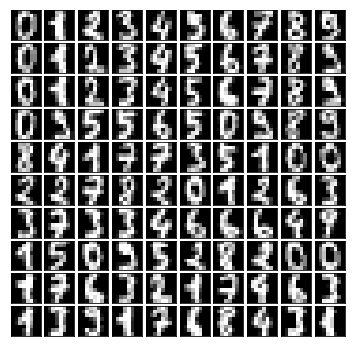

In [50]:
# plot numbers
_, ax = plt.subplots(10, 10, figsize=(6, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, a in enumerate(ax.flat):
    a.imshow(X[i].reshape(shape), cmap=plt.cm.gray)

In [51]:
# n components, k nearest neighbors
n, k = 2, 15

models = [
    ("PCA", PCA(n_components=n)),
    ("Isomap", Isomap(n_components=n, n_neighbors=k)),
    ("LLE", LocallyLinearEmbedding(n_components=n, n_neighbors=k)),
    ("Laplacian Eignenmaps", SpectralEmbedding(n_components=n, n_neighbors=k))
]

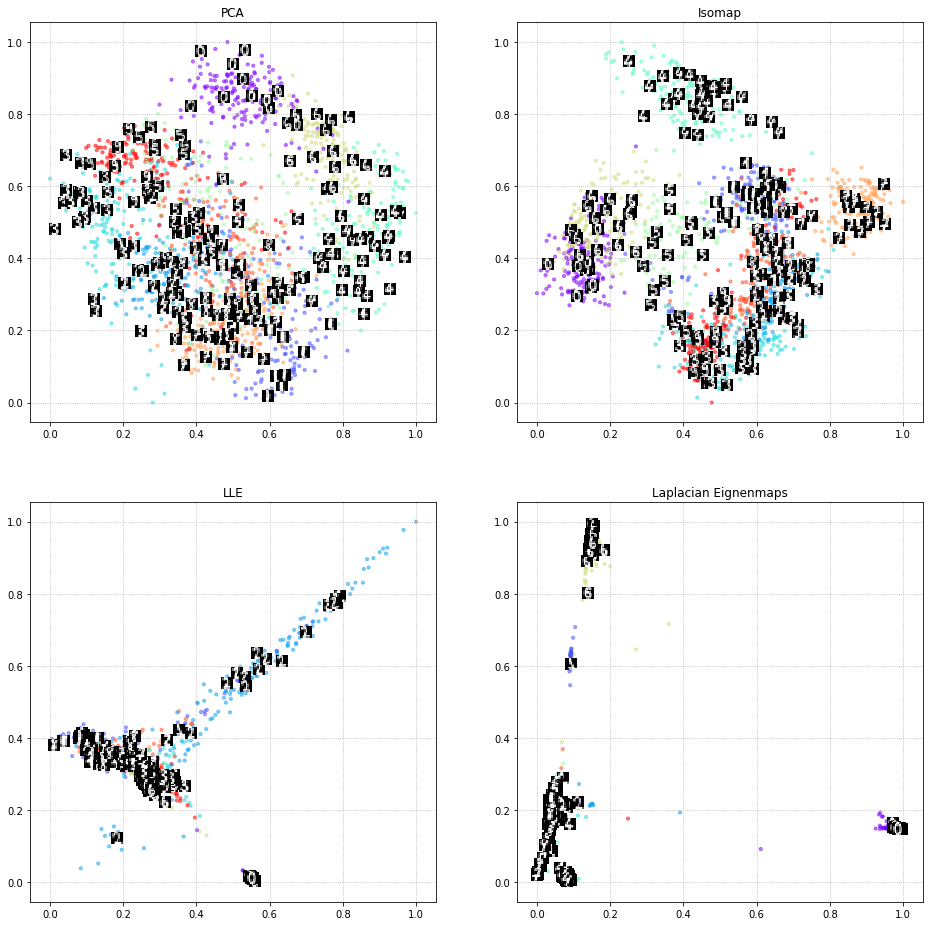

In [52]:
plt.figure(figsize=(16,25))

for key, model in enumerate(models):
    X_transformed = MinMaxScaler().fit_transform(model[1].fit_transform(X))
    plt.subplot(320 + (key+1))
    plt.title(model[0])
    plt.grid(linestyle="dotted")
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.5, s=10, c=y, cmap=plt.cm.rainbow)
    
    # plot images
    ax = plt.gca()
    for i in range(0, X.shape[0], 10):
        box = offsetbox.AnnotationBbox(offsetbox.OffsetImage(X[i].reshape(shape), cmap="gray", zoom=1.5), X_transformed[i], frameon=False)
        ax.add_artist(box)
    
plt.show()

## 3. MNIST

In [53]:
mnist = fetch_mldata('MNIST original')
train_size = 60000

X_train, X_test, y_train, y_test = \
mnist.data[:train_size,:], mnist.data[train_size:,:], \
mnist.target[:train_size], mnist.target[train_size:]

print("Dataset summary:\nSamples: {}, features: {}, classes: {}"
      .format(X_train.shape[0] + X_test.shape[0], X_train.shape[1], np.unique(y_train).shape[0]))

Dataset summary:
Samples: 70000, features: 784, classes: 10


/Users/okachan/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/okachan/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


**Exercise:** explore manifolds of different digits, try to interpreted embedding coordinates.

In [58]:
X = X_test[y_test==8]
shape = (int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1])))

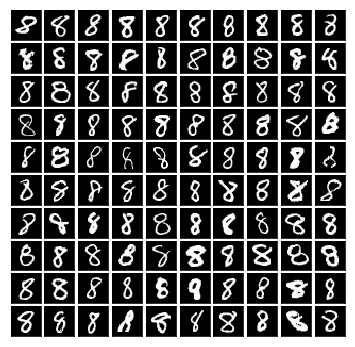

In [59]:
# plot numbers
_, ax = plt.subplots(10, 10, figsize=(6, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, a in enumerate(ax.flat):
    a.imshow(X[i].reshape(shape), cmap=plt.cm.gray)

In [60]:
# n components, k nearest neighbors
n, k = 2, 15

models = [
    ("PCA", PCA(n_components=n)),
    ("Isomap", Isomap(n_components=n, n_neighbors=k)),
    ("LLE", LocallyLinearEmbedding(n_components=n, n_neighbors=k)),
    ("Laplacian Eignenmaps", SpectralEmbedding(n_components=n, n_neighbors=k))
]

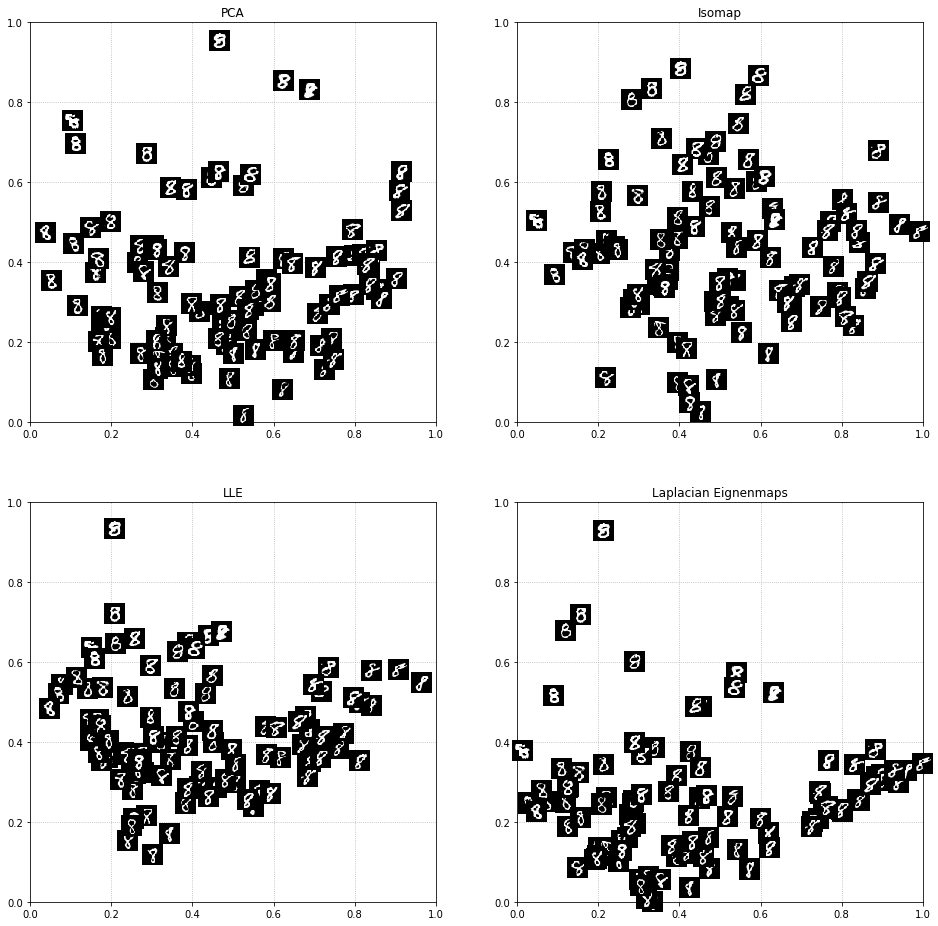

In [61]:
plt.figure(figsize=(16,25))

for key, model in enumerate(models):
    X_transformed = MinMaxScaler().fit_transform(model[1].fit_transform(X))
    plt.subplot(320 + (key+1))
    plt.title(model[0])
    plt.grid(linestyle="dotted")
    #plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.5, s=10)
    
    # plot images
    ax = plt.gca()
    for i in range(0, X.shape[0], 10):
        box = offsetbox.AnnotationBbox(offsetbox.OffsetImage(X[i].reshape(shape), cmap=plt.cm.get_cmap('gray'), zoom=0.75), X_transformed[i], frameon=False)
        ax.add_artist(box)
    
plt.show()

## 4. Airfoils

In [62]:
ref_points = np.loadtxt('../seminar1/data/ref_points.csv', delimiter=',')
X = np.loadtxt('../seminar1/data/airfoils.csv', delimiter=',')
X_oos = np.loadtxt('../seminar1/data/test_afl.csv', delimiter=',').reshape(1, -1)
X.shape, X_oos.shape

((199, 59), (1, 59))

In [63]:
# n components, k nearest neighbors
n, k = 2, 15

models = [
    ("PCA", PCA(n_components=n)),
    ("Isomap", Isomap(n_components=n, n_neighbors=k)),
    ("LLE", LocallyLinearEmbedding(n_components=n, n_neighbors=k)),
    ("Laplacian Eignenmaps", SpectralEmbedding(n_components=n, n_neighbors=k))
]

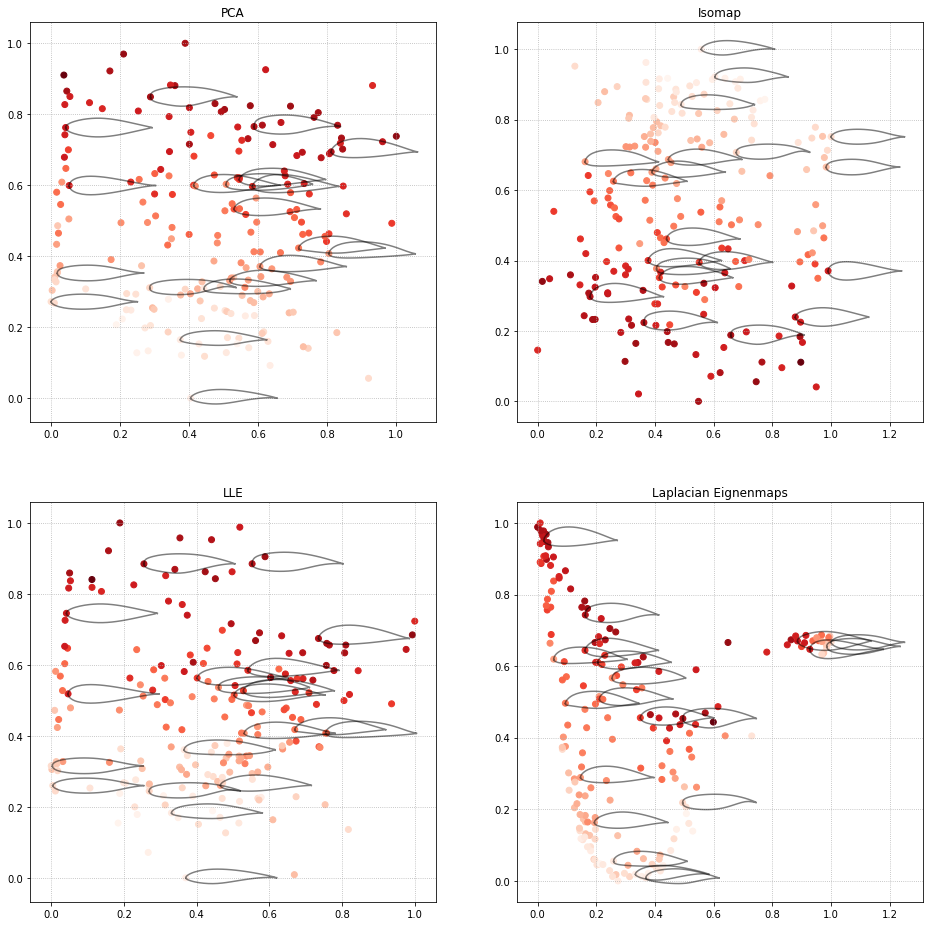

In [64]:
plt.figure(figsize=(16,25))

# color, proportional to height-to-width ratio
colors = MinMaxScaler().fit_transform((np.max(X[:, :], axis=1) - np.min(X[:, :], axis=1)).reshape(-1, 1)).ravel()

for key, value in enumerate(models):
    X_transformed = MinMaxScaler().fit_transform(value[1].fit_transform(X))
    plt.subplot(320 + (key+1))
    plt.title(value[0])
    plt.grid(linestyle="dotted")
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=colors, cmap="Reds")
    
    for i in range(0, 199, 10):
        plt.plot(X_transformed[i, 0] + ref_points / 4, X_transformed[i, 1] + X[i, :] / 2, '-', label = 'Airfoil #' + str(i), c='k', alpha=0.5)

plt.show()

## 5. Out-of-Sample extension

**Exercise:** Which methods have OoS extensions?

In [65]:
model = LocallyLinearEmbedding(n_components=2, n_neighbors=21).fit(X)

X_transformed = model.transform(X)
X_transformed_oos = model.transform(X_oos)

In [66]:
# scale data
scaler = MinMaxScaler().fit(X_transformed)
X_transformed = scaler.transform(X_transformed)
X_transformed_oos = scaler.transform(X_transformed_oos)

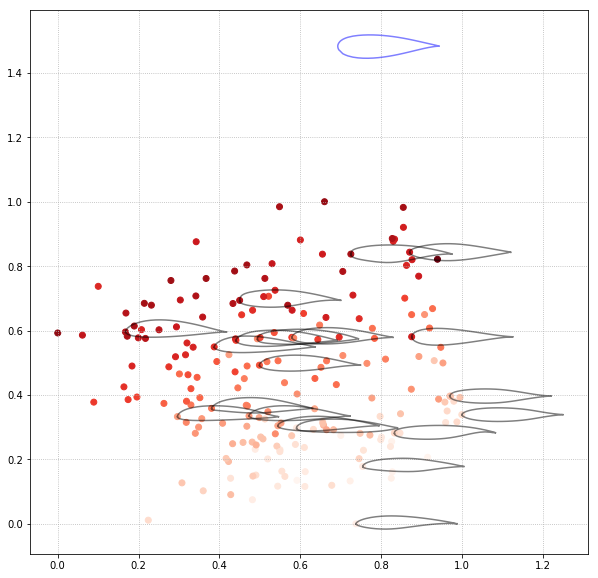

In [67]:
plt.figure(figsize=(10,10))
plt.grid(linestyle="dotted")
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=colors, cmap="Reds")
    
for i in range(0, 199, 10):
    plt.plot(X_transformed[i, 0] + ref_points / 4, X_transformed[i, 1] + X[i, :] / 2, '-', c='k', alpha=0.5)

plt.plot(X_transformed_oos[0, 0] + ref_points / 4, X_transformed_oos[0, 1] + X_oos[0, :] / 2, '-', c='b', alpha=0.5)